In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%config Completer.use_jedi = False

### 데이터 다운로드, 전처리 및 분석

In [3]:
# stanford dog breed 데이터 세트 다운로드 
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
# 현재 디렉토리인 /kaggle/working에 바로 압축 해제 
!ls; tar -xvf images.tar

--2024-03-23 06:10:52--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: 'images.tar'

images.tar          100%[===================>] 756.82M  17.6MB/s    in 44s     

2024-03-23 06:11:36 (17.2 MB/s) - 'images.tar' saved [793579520/793579520]

__notebook__.ipynb  images.tar
Images/
Images/n02085620-Chihuahua/
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_11948.j

In [4]:
!ls; pwd

Images	__notebook__.ipynb  images.tar
/kaggle/working


In [5]:
# working 아래에 images 디렉토리로 이동
!cd /kaggle/working/Images;ls

n02085620-Chihuahua			  n02100583-vizsla
n02085782-Japanese_spaniel		  n02100735-English_setter
n02085936-Maltese_dog			  n02100877-Irish_setter
n02086079-Pekinese			  n02101006-Gordon_setter
n02086240-Shih-Tzu			  n02101388-Brittany_spaniel
n02086646-Blenheim_spaniel		  n02101556-clumber
n02086910-papillon			  n02102040-English_springer
n02087046-toy_terrier			  n02102177-Welsh_springer_spaniel
n02087394-Rhodesian_ridgeback		  n02102318-cocker_spaniel
n02088094-Afghan_hound			  n02102480-Sussex_spaniel
n02088238-basset			  n02102973-Irish_water_spaniel
n02088364-beagle			  n02104029-kuvasz
n02088466-bloodhound			  n02104365-schipperke
n02088632-bluetick			  n02105056-groenendael
n02089078-black-and-tan_coonhound	  n02105162-malinois
n02089867-Walker_hound			  n02105251-briard
n02089973-English_foxhound		  n02105412-kelpie
n02090379-redbone			  n02105505-komondor
n02090622-borzoi			  n02105641-Old_English_sheepdog
n02090721-Irish_wolfhound		  n02105855-Shetland_sheepdog
n02091032-Itali

In [6]:
# 파일 이름이랑 절대경로 출력

import os

for dirname, _, filenames in os.walk('/kaggle/working/Images'):
#     for filename in filenames:
# #         print(os.path.join(dirname, filename))
    print(dirname)

/kaggle/working/Images
/kaggle/working/Images/n02109047-Great_Dane
/kaggle/working/Images/n02089867-Walker_hound
/kaggle/working/Images/n02094433-Yorkshire_terrier
/kaggle/working/Images/n02115913-dhole
/kaggle/working/Images/n02105855-Shetland_sheepdog
/kaggle/working/Images/n02115641-dingo
/kaggle/working/Images/n02097658-silky_terrier
/kaggle/working/Images/n02112706-Brabancon_griffon
/kaggle/working/Images/n02106662-German_shepherd
/kaggle/working/Images/n02097130-giant_schnauzer
/kaggle/working/Images/n02095889-Sealyham_terrier
/kaggle/working/Images/n02093754-Border_terrier
/kaggle/working/Images/n02098413-Lhasa
/kaggle/working/Images/n02113712-miniature_poodle
/kaggle/working/Images/n02106382-Bouvier_des_Flandres
/kaggle/working/Images/n02108422-bull_mastiff
/kaggle/working/Images/n02112137-chow
/kaggle/working/Images/n02090721-Irish_wolfhound
/kaggle/working/Images/n02093647-Bedlington_terrier
/kaggle/working/Images/n02100236-German_short-haired_pointer
/kaggle/working/Images/n

### 이미지 파일들의 디렉토리와 파일명을 기반으로 메타 정보인 이미지 절대경로, 레이블을 DataFrame으로 생성
* 이미지 디렉토리를 보면 /kaggle/working/Images/ 아래에 품종별로 구분되어 있음
* 레이블 값은 이미지 파일의 절대경로에서 이미지 파일 바로 위에 있는 서브 디렉토리를 가공해 생성 ??? 뭔 소리임

In [7]:
# 기존 directory 안에 있는 파일에서 품종 이름을 뽑아내기 위한 작업이다.
start_pos = '/kaggle/working/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'.find('/', 20)
end_pos = '/kaggle/working/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'.rfind('/')

imsi_breed = '/kaggle/working/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'[start_pos+1: end_pos]
print(imsi_breed)

breed = imsi_breed[imsi_breed.find('-')+1:]
print(breed)

n02109961-Eskimo_dog
Eskimo_dog


In [8]:
IMAGE_DIR = '/kaggle/working/Images'

def make_dogbreed_dataframe(image_dir=IMAGE_DIR):
    paths = []
    label_gubuns = []
    for dirname, _, filenames in os.walk(image_dir):
        for filename in filenames:
            if '.jpg' in filename:
                # 이미지 파일 절대경로를 file_path에 할당
                file_path = dirname+'/'+filename
                paths.append(file_path)
                # 이미지 파일의 절대 경로에서 레이블명 생성을 위한 1차 추출
                start_pos = file_path.find('/', 20)
                end_pos = file_path.rfind('/')
                imsi_breed = file_path[start_pos+1:end_pos]
                # 1차 추출된 데이터를 기반으로 2차 추출
                breed = imsi_breed[imsi_breed.find('-')+1:]
                # 추출한 품종명을 label_gubuns에 할당
                label_gubuns.append(breed)
    
    # dataframe 생성
    data_df = pd.DataFrame({'path':paths, 'label':label_gubuns})
    return data_df
        

In [9]:
pd.set_option('display.max_colwidth', 200)
data_df = make_dogbreed_dataframe()
print('data_df shape:', data_df.shape)
data_df.head()

data_df shape: (20580, 2)


path       label
0  /kaggle/working/Images/n02109047-Great_Dane/n02109047_13072.jpg  Great_Dane
1  /kaggle/working/Images/n02109047-Great_Dane/n02109047_34175.jpg  Great_Dane
2   /kaggle/working/Images/n02109047-Great_Dane/n02109047_2465.jpg  Great_Dane
3  /kaggle/working/Images/n02109047-Great_Dane/n02109047_34022.jpg  Great_Dane
4    /kaggle/working/Images/n02109047-Great_Dane/n02109047_744.jpg  Great_Dane

### Dog Breed의 개별 분포도 확인

In [10]:
print(data_df.shape)
# breed 건수 확인
data_df['label'].value_counts()

(20580, 2)


label
Maltese_dog             252
Afghan_hound            239
Scottish_deerhound      232
Pomeranian              219
Samoyed                 218
                       ... 
malinois                150
affenpinscher           150
Bouvier_des_Flandres    150
Pekinese                149
redbone                 148
Name: count, Length: 120, dtype: int64

In [11]:
data_df['label'].value_counts().index.tolist()

['Maltese_dog',
 'Afghan_hound',
 'Scottish_deerhound',
 'Pomeranian',
 'Samoyed',
 'Bernese_mountain_dog',
 'Irish_wolfhound',
 'Shih-Tzu',
 'Great_Pyrenees',
 'Leonberg',
 'basenji',
 'Tibetan_terrier',
 'EntleBucher',
 'Sealyham_terrier',
 'Airedale',
 'Saluki',
 'pug',
 'Lakeland_terrier',
 'cairn',
 'papillon',
 'chow',
 'Norwegian_elkhound',
 'Australian_terrier',
 'beagle',
 'Newfoundland',
 'Siberian_husky',
 'Ibizan_hound',
 'Blenheim_spaniel',
 'whippet',
 'bloodhound',
 'Lhasa',
 'Norwich_terrier',
 'Japanese_spaniel',
 'miniature_pinscher',
 'silky_terrier',
 'Bedlington_terrier',
 'Boston_bull',
 'Italian_greyhound',
 'Pembroke',
 'Dandie_Dinmont',
 'Kerry_blue_terrier',
 'malamute',
 'basset',
 'Rhodesian_ridgeback',
 'Norfolk_terrier',
 'toy_terrier',
 'Border_terrier',
 'bluetick',
 'Labrador_retriever',
 'Saint_Bernard',
 'African_hunting_dog',
 'West_Highland_white_terrier',
 'Old_English_sheepdog',
 'Irish_terrier',
 'Greater_Swiss_Mountain_dog',
 'Chesapeake_Bay_ret

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]),
 [Text(0, 0, 'Great_Dane'),
  Text(1, 0, 'Walker_hound'),
  Text(2, 0, 'Yorkshire_terrier'),
  Text(3, 0, 'dhole'),
  Text(4, 0, 'Shetland_sheepdog'),
  Text(5, 0, 'dingo'),
  Text(6, 0, 'silky_terrier'),
  Text(7, 0, 'Brabancon_griffon'),
  Text(8, 0, 'German_shepherd'),
  Text(9, 0, 'giant_schnauzer'),
  Text(10, 0

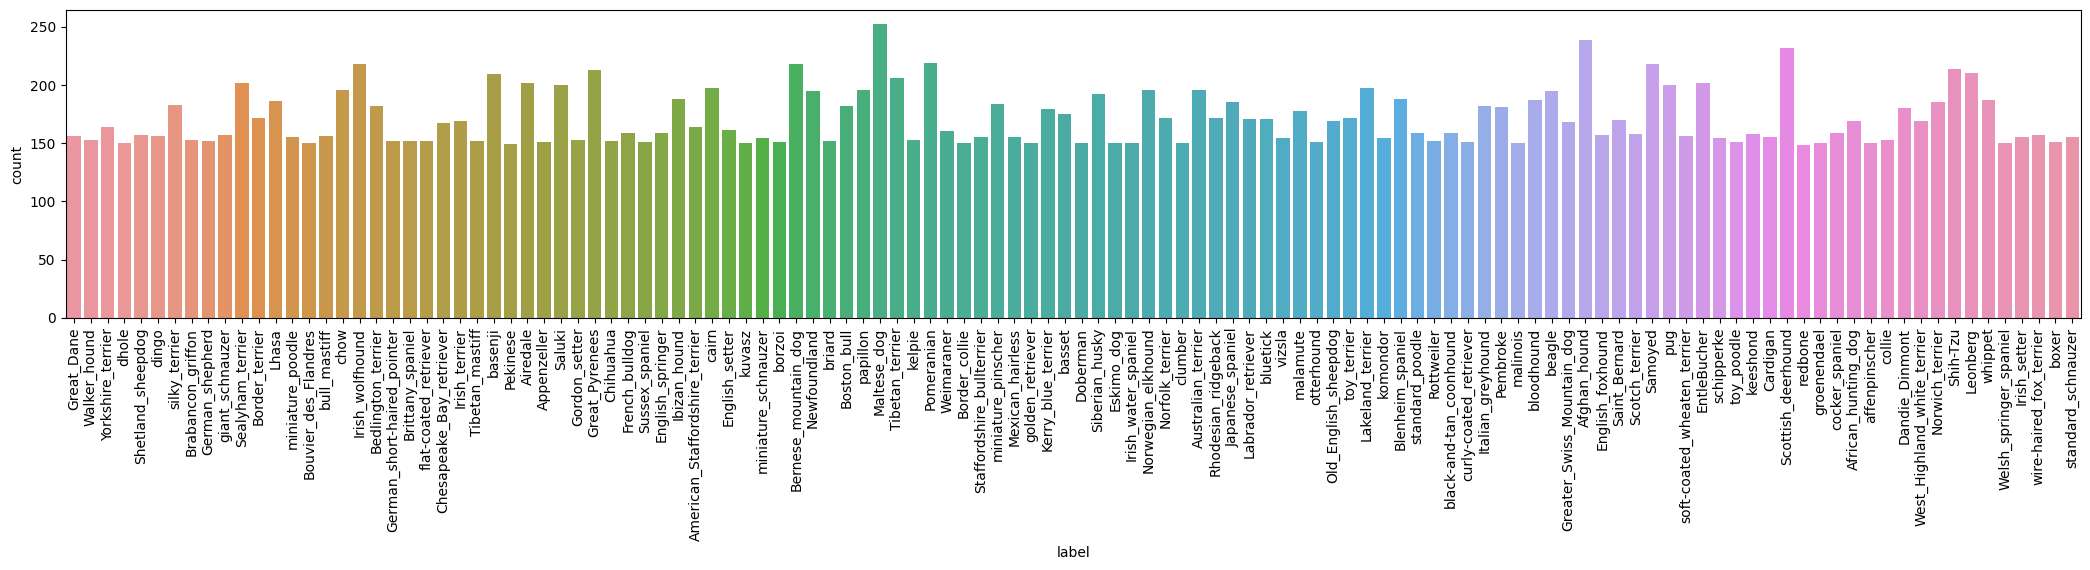

In [12]:
# 막대 그래프 형태로 breed별 건수 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(26,4))

sns.countplot(data = data_df, x='label')
plt.xticks(rotation=90)

### Dog Breed 이미지 보기

In [13]:
import cv2

# dog breed별로 image를 보기 위한 utility 함수 생성.
def show_grid_image(image_path_list, ncols=6, title=None):
    fig, axs = plt.subplots(figsize=(22,4), ncols=ncols, nrows=1)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)

In [14]:
breed_image_list_01 = data_df[data_df['label']=='Staffordshire_bullterrier']['path'].iloc[:6].tolist()
breed_image_list_02 = data_df[data_df['label']=='Japanese_spaniel']['path'].iloc[:6].tolist()

print(breed_image_list_01,'\n')
print(breed_image_list_02)

['/kaggle/working/Images/n02093256-Staffordshire_bullterrier/n02093256_1745.jpg', '/kaggle/working/Images/n02093256-Staffordshire_bullterrier/n02093256_3462.jpg', '/kaggle/working/Images/n02093256-Staffordshire_bullterrier/n02093256_4972.jpg', '/kaggle/working/Images/n02093256-Staffordshire_bullterrier/n02093256_3297.jpg', '/kaggle/working/Images/n02093256-Staffordshire_bullterrier/n02093256_4090.jpg', '/kaggle/working/Images/n02093256-Staffordshire_bullterrier/n02093256_5646.jpg'] 

['/kaggle/working/Images/n02085782-Japanese_spaniel/n02085782_3030.jpg', '/kaggle/working/Images/n02085782-Japanese_spaniel/n02085782_2655.jpg', '/kaggle/working/Images/n02085782-Japanese_spaniel/n02085782_1600.jpg', '/kaggle/working/Images/n02085782-Japanese_spaniel/n02085782_172.jpg', '/kaggle/working/Images/n02085782-Japanese_spaniel/n02085782_1434.jpg', '/kaggle/working/Images/n02085782-Japanese_spaniel/n02085782_50.jpg']


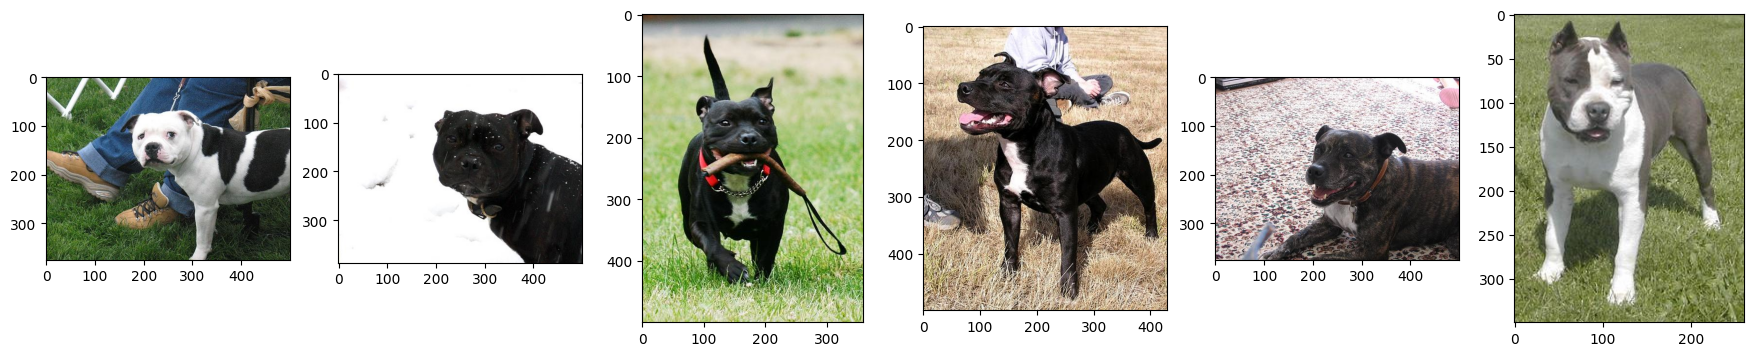

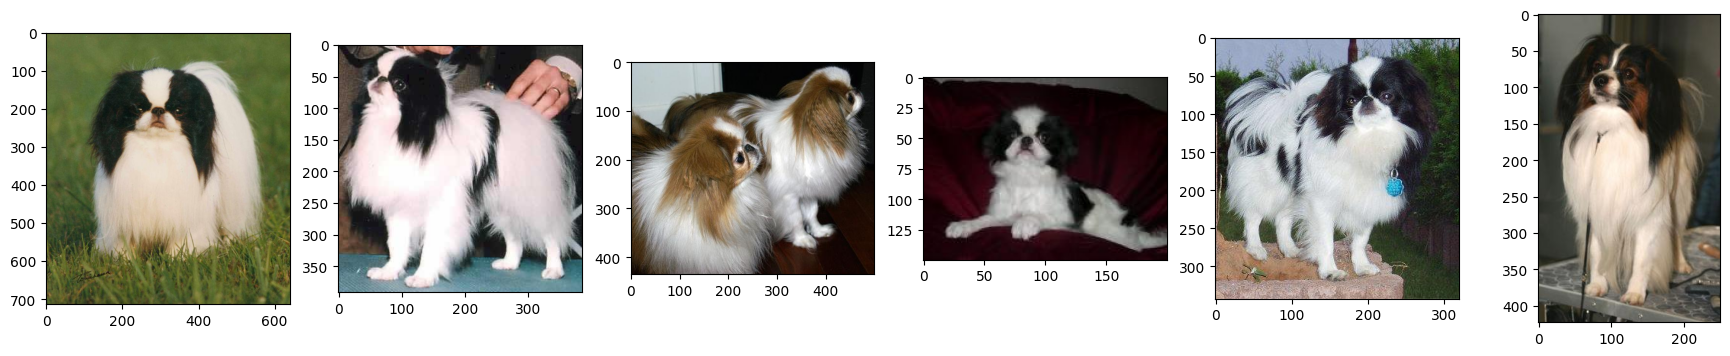

In [15]:
show_grid_image(breed_image_list_01)

show_grid_image(breed_image_list_02)

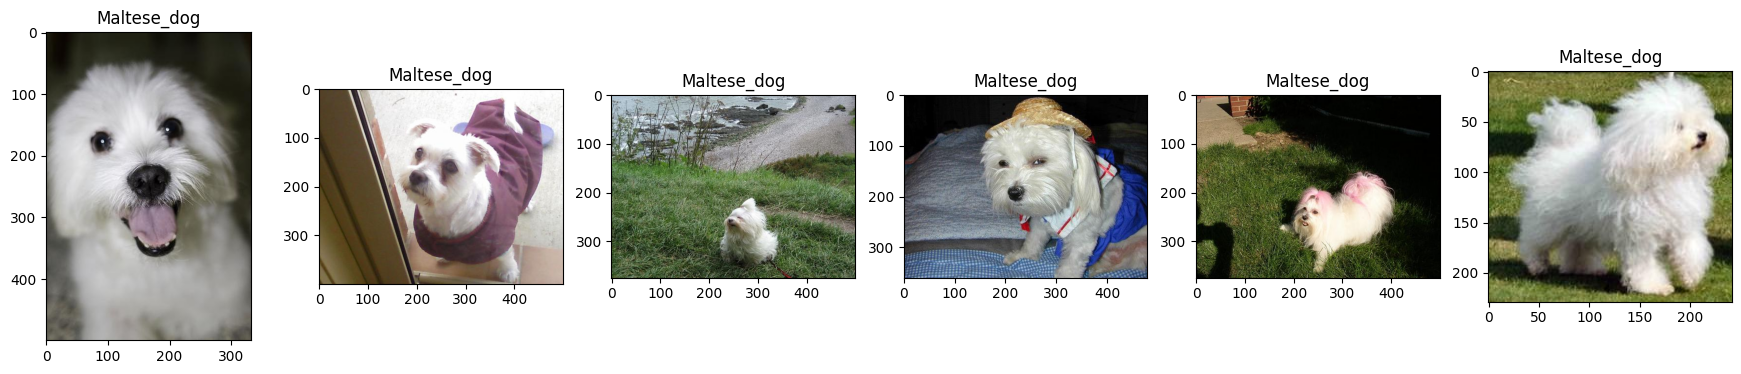

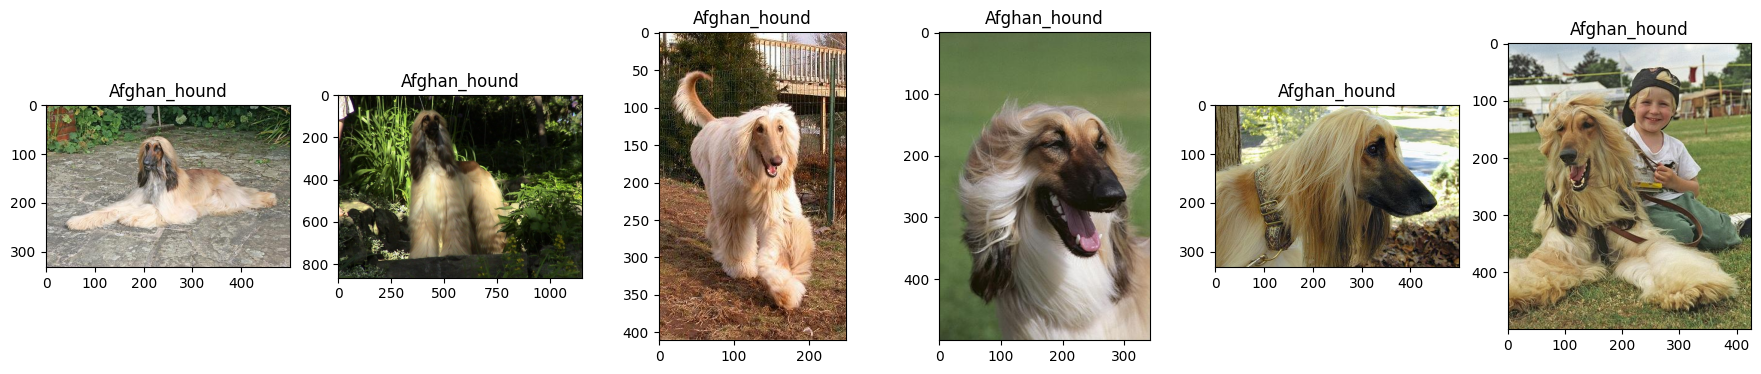

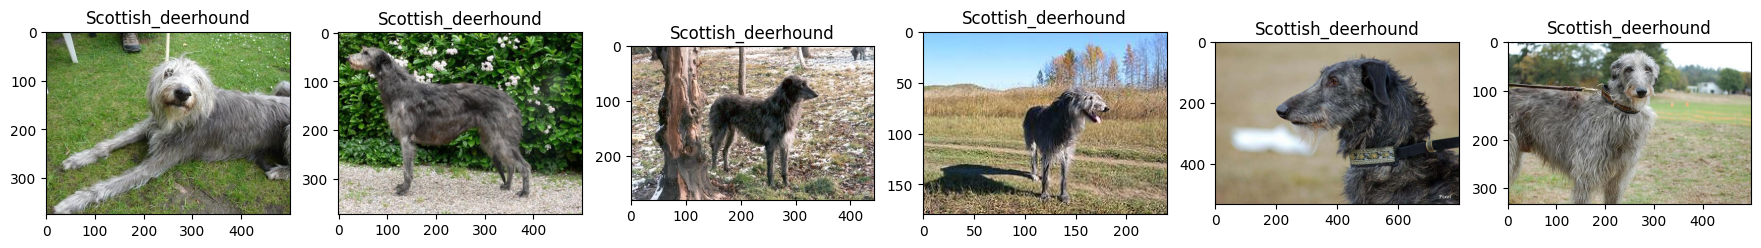

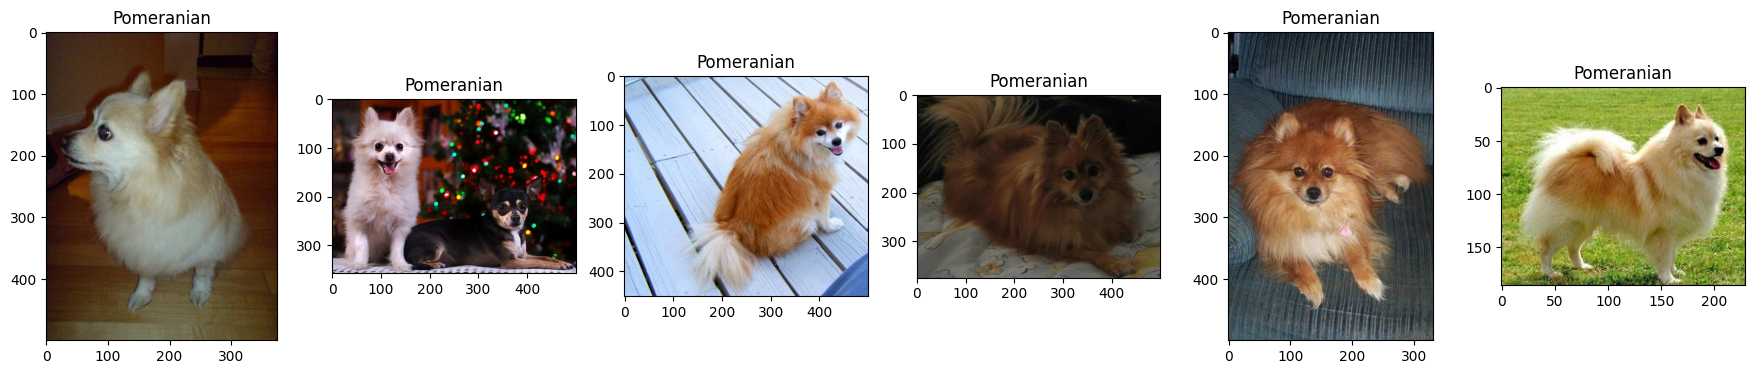

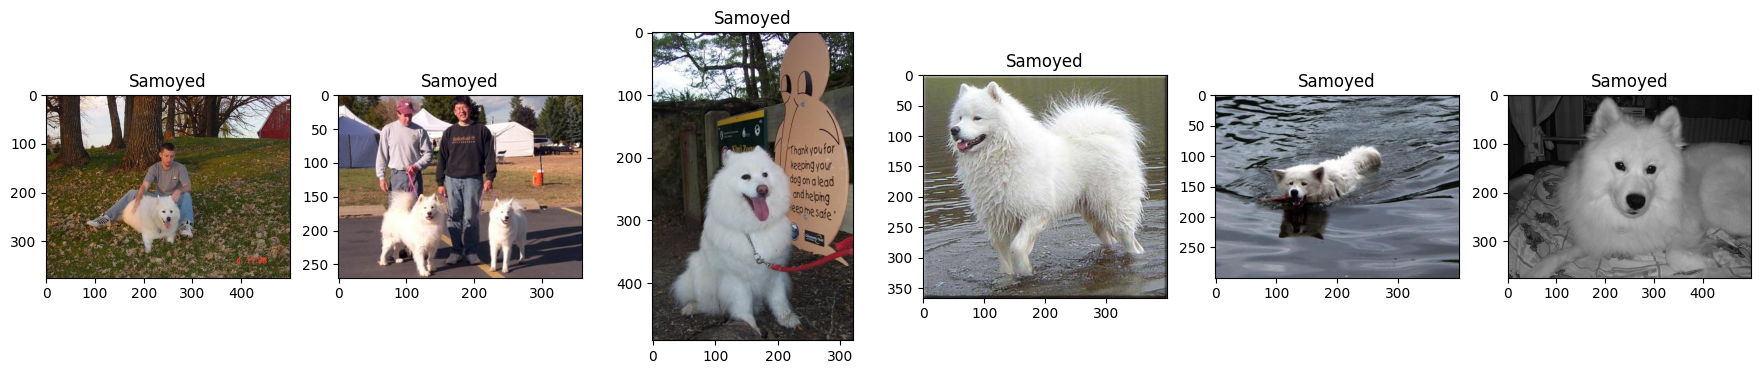

In [16]:
# 여러 품종 이미지 한꺼번에 보기

breed_list = data_df['label'].value_counts().index.tolist()

for iter_cnt, breed in enumerate(breed_list):
    breed_image_list = data_df[data_df['label'] == breed]['path'].iloc[:6].tolist()
    show_grid_image(breed_image_list,ncols=6 ,title=breed)
    if iter_cnt == 4:
        break

### 이미지 사이즈를 224x224로 고정하고 Augmentation 적용한 이미지 보기

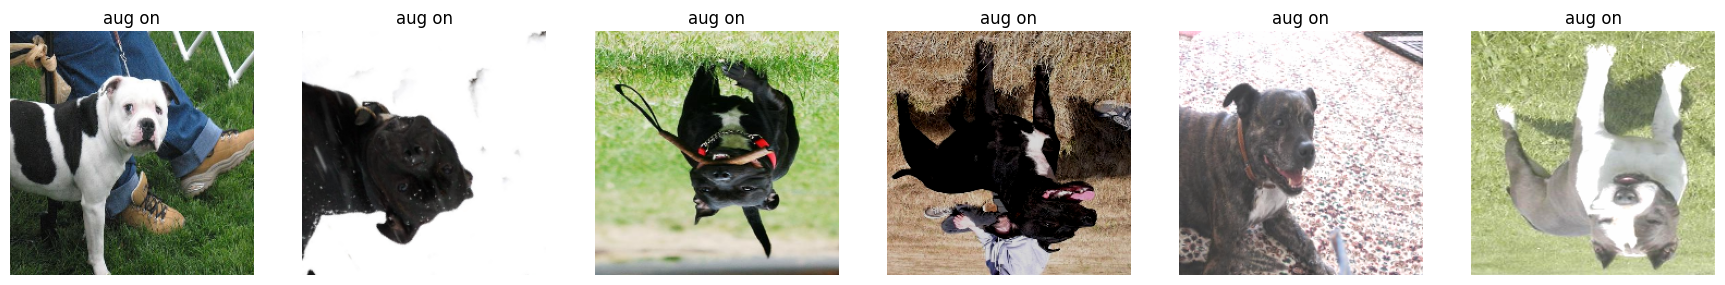

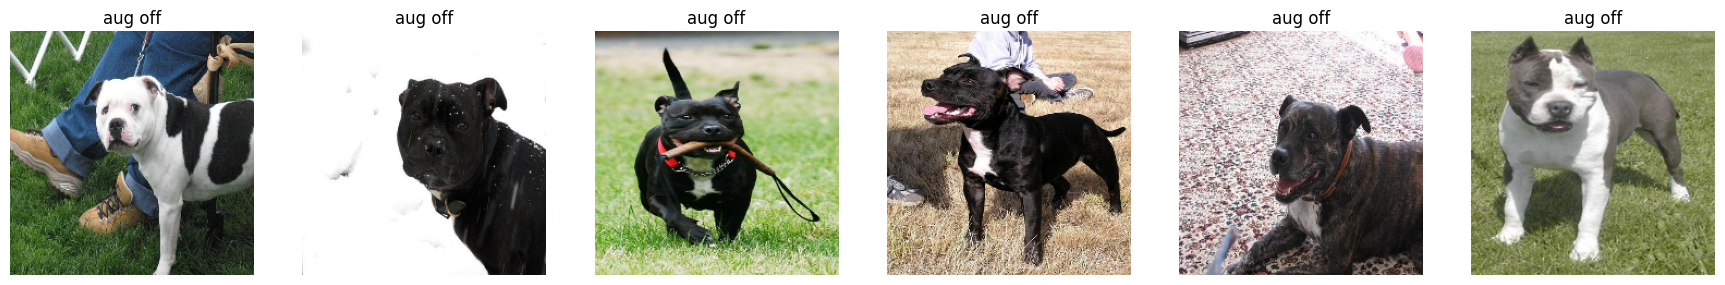

In [17]:
import albumentations as A

# crop의 경우 이미지 중앙에 사람이 있을 경우 개가 잘리고 사람만 남을 수 있으니 이에 유의한다.
image_augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5)
])

def show_grid_images(image_path_list, augmentor=None, ncols=6, title=None):
    fig, axs = plt.subplots(figsize=(22,4), ncols=6, nrows=1)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224,224))
        if augmentor is not None:
            image = image_augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title)
        
breed_image_list_01 = data_df[data_df['label']=='Staffordshire_bullterrier']['path'].iloc[:6].tolist()
show_grid_images(breed_image_list_01, augmentor=image_augmentor, title='aug on')
show_grid_images(breed_image_list_01, augmentor=None, title='aug off')

### 전체 DataFrame을 학습과 테스트용으로 분리하고, 학습용은 다시 학습용과 검증용으로 분리한다.
* sklearn의 train_test_split()을 이용해 전체 데이터 40%를 테스트 데이터로 할당한다.

In [18]:
data_df.head()

path       label
0  /kaggle/working/Images/n02109047-Great_Dane/n02109047_13072.jpg  Great_Dane
1  /kaggle/working/Images/n02109047-Great_Dane/n02109047_34175.jpg  Great_Dane
2   /kaggle/working/Images/n02109047-Great_Dane/n02109047_2465.jpg  Great_Dane
3  /kaggle/working/Images/n02109047-Great_Dane/n02109047_34022.jpg  Great_Dane
4    /kaggle/working/Images/n02109047-Great_Dane/n02109047_744.jpg  Great_Dane

In [19]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size=0.4, stratify=data_df['label'], random_state=42)

print(train_df.shape, test_df.shape)

(12348, 2) (8232, 2)


In [20]:
# train, test data 구분 비율이다.
# 위에서 stratify의 data_df['label']을 기준으로 데이터를 분류해서 label 별로 구분 비율이 일정하다.


print(train_df['label'].value_counts()/train_df.shape[0],'\n')
print(test_df['label'].value_counts()/test_df.shape[0])

label
Maltese_dog               0.012229
Afghan_hound              0.011581
Scottish_deerhound        0.011257
Pomeranian                0.010690
Bernese_mountain_dog      0.010609
                            ...   
golden_retriever          0.007289
clumber                   0.007289
Welsh_springer_spaniel    0.007289
groenendael               0.007289
redbone                   0.007208
Name: count, Length: 120, dtype: float64 

label
Maltese_dog             0.012269
Afghan_hound            0.011662
Scottish_deerhound      0.011297
Samoyed                 0.010569
Bernese_mountain_dog    0.010569
                          ...   
Border_collie           0.007289
dhole                   0.007289
borzoi                  0.007289
redbone                 0.007167
Pekinese                0.007167
Name: count, Length: 120, dtype: float64


In [21]:
# Dataframe에서 numpy array로 변환
train_path = train_df['path'].values
train_label = pd.get_dummies(train_df['label']).values

# 학습 데이터를 다시 학습과 검증용으로 분리

tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, stratify=train_label, test_size=0.2, random_state=42)
print(tr_path.shape, tr_label.shape)
print(val_path.shape, val_label.shape)

(9878,) (9878, 120)
(2470,) (2470, 120)


### Sequence 기반의 Dataset 생성
* image size 인자를 통해 여러 모델에 대응할 수 있도록 설계
* 예를 들면 keras efficientb0는 224x224 이미지로, efficientb1은 240x240 이미지로 최적화를 진행한다
* Albumentation의 crop 등을 적용하기 위해 augmentation 적용 후 cv2.resize() 적용
* augmentation은 기본적인 좌우반전부터 시작

In [22]:
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import sklearn
import cv2

BATCH_SIZE = 64
IMAGE_SIZE = 224

class Breed_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                augmentor=None, shuffle=False, pre_func=None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 가져올 데이터 batch 건수
        augmentor: albumentation 객체
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.shuffle = shuffle
        self.pre_func = pre_func
        
    # Sequence를 상속받은 dataset은 batch_size 단위로 입력된 데이터를 처리한다.
    # __len__()은 전체 데이터 건수가 주어졌을 때 batch_size 단위로 몇 번 데이터를 반환하는지 나타남
    def __len__(self):
        # batch_size 단위로 데이터를 몇 번 갖고와야 하는지 계산
        return int(np.ceil(len(self.labels)/ self.batch_size))
    
    def __getitem__(self, index):
        # index는 몇 번째 batch인지 나타낸다
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype='float32')
        
        # 만일 객체 생성 인자로 albumentation으로 만든 augmentor가 주어진다면 아래와 같이 augmentor로 이미지 변환
        # albmentation은 개별 이미지만 변환할 수 있으므로 batch_size에 따라 뽑이온 이미지를 하나씩 변환해줘야 한다.
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            # crop과 같이 잘린 이미지가 원본 이미지와 다르게 나타나는 경우가 있으므로 resize 적용
            image = cv2.resize(image, (self.image_size, self.image_size))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용해 scaling 적용
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
            
        return image_batch, label_batch
    
    # epoch가 한 번 수행이 끝날 때 모델의 fit()에서 호출
    def on_epoch_end(self):
        if self.shuffle:
            self.image_filenames, self.labels = shuffle(self.image_filenames, self.labels)
        else:
            pass

2024-03-23 06:12:05.520433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 06:12:05.520535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 06:12:05.655228: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 좌우 반전을 수행하는 augmentation 설정

In [23]:
import albumentations as A

augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5)
])

In [24]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input

# 학습용, 검증용 breed_dataset 생성
tr_ds = Breed_Dataset(tr_path,tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                      augmentor=augmentor_light, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Breed_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                      augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

# 항상 dataset 생성 후에 next를 통해서 augmentation 적용 여부 확인
# 인덱싱을 안 하면 tuple 값으로 이미지 값과 one hot encoding이 된 label 값이 나온다.
tr_image_batch = next(iter(tr_ds))[0]
val_image_batch = next(iter(val_ds))[0]

print(tr_image_batch.shape, val_image_batch.shape)
print(tr_image_batch[:1])
print(val_image_batch[:1])

(64, 224, 224, 3) (64, 224, 224, 3)
[[[[-0.9529412  -0.9372549  -0.9607843 ]
   [-0.94509804 -0.92156863 -0.94509804]
   [-0.92941177 -0.92156863 -0.94509804]
   ...
   [-0.81960785 -0.81960785 -0.81960785]
   [-0.8039216  -0.8039216  -0.8039216 ]
   [-0.81960785 -0.81960785 -0.81960785]]

  [[-0.92156863 -0.90588236 -0.92156863]
   [-0.90588236 -0.8901961  -0.9137255 ]
   [-0.94509804 -0.92941177 -0.9529412 ]
   ...
   [-0.77254903 -0.77254903 -0.77254903]
   [-0.8117647  -0.8117647  -0.8117647 ]
   [-0.81960785 -0.81960785 -0.81960785]]

  [[-0.9372549  -0.92156863 -0.94509804]
   [-0.92156863 -0.9137255  -0.9372549 ]
   [-0.8980392  -0.88235295 -0.90588236]
   ...
   [-0.7882353  -0.7882353  -0.7882353 ]
   [-0.8117647  -0.8117647  -0.8117647 ]
   [-0.8352941  -0.8352941  -0.8352941 ]]

  ...

  [[-0.31764704 -0.3333333  -0.29411763]
   [-0.32549018 -0.35686272 -0.32549018]
   [-0.25490195 -0.30196077 -0.27058822]
   ...
   [-0.15294117 -0.16862744 -0.12941176]
   [-0.11372548 -0.12